<a href="https://colab.research.google.com/github/Erssa001/ECGR_4105/blob/main/HW1_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/2023-2024/ECGR_4105/D3.csv'
sample = pd.read_csv(file_path)

X1 = sample.values[:, 0]
X2 = sample.values[:, 1]
X3 = sample.values[:, 2]
inputs = [X1,X2,X3]
Y = sample.values[:, 3]
m = len(Y)  # Number of training examples
n = [len(X1), len(X2), len(X3)]  # Number of training examples

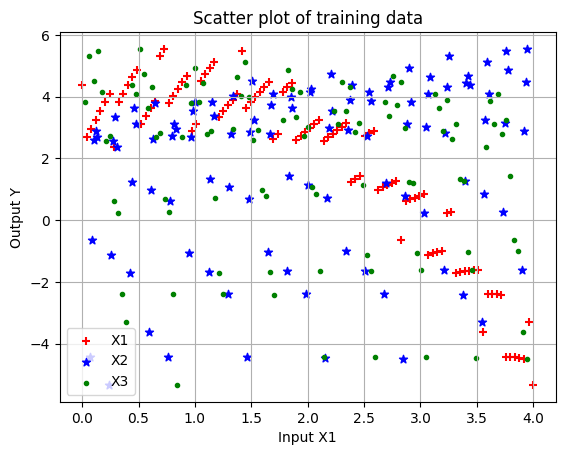

In [4]:
# Scatter plot
plt.scatter(X1, Y, color='red', marker='+', label="X1")
plt.scatter(X2, Y, color='blue', marker='*', label="X2")
plt.scatter(X3, Y, color='green', marker='.', label="X3")
# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('Input X1')
plt.ylabel('Output Y')
plt.title('Scatter plot of training data')
plt.legend(loc="best")

# Show the plot
plt.show()

In [5]:

def reshape_inputs(X, m):
  X_1 = X.reshape(m, 1)
  return X_1

for i in range(len(inputs)):
  inputs[i - 1] = reshape_inputs(inputs[i - 1],m)
X_0 = np.ones((m, 1))
X_t = np.hstack((X_0, inputs[0], inputs[1], inputs[2]))

In [6]:
def compute_cost(X, Y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [7]:
def gradient_descent(X, Y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(Y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, Y, theta)

    return theta, cost_history

In [8]:
theta = np.zeros(4)
iterations = 2000
alpha = 0.025

In [9]:
theta, cost_history = gradient_descent(X_t, Y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 5.27885045 -1.9987302   0.53839921 -0.26042515]
cost_history = [4.82258027 4.44307592 4.20358607 ... 0.73853135 0.73853101 0.73853068]


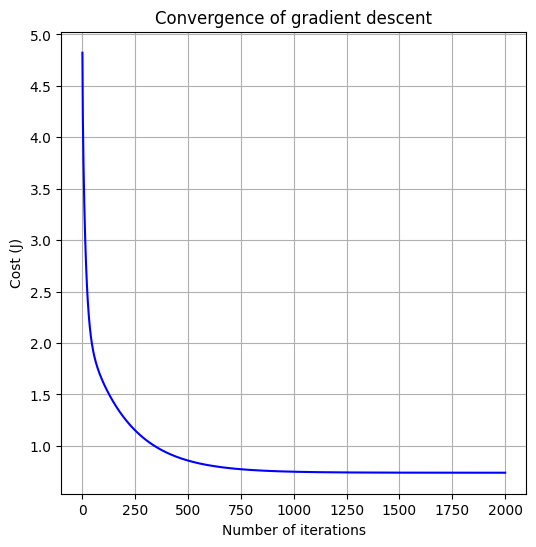

In [10]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [18]:
# Pridiction Block
test_cases = [[1, 1, 1], [2, 0, 4], [3, 2, 1]]
Y_pred = np.zeros(len(test_cases))
for i in range(len(test_cases)):
  for j in range(len(test_cases[i])):
    Y_pred[i] += (test_cases[i][j] * theta[j + 1])
  Y_pred[i] += theta[0]
  print("Y prediction for test case ", (i + 1), ": ", Y_pred[i])

Y prediction for test case  1 :  3.5580943055378382
Y prediction for test case  2 :  0.2396894480399432
Y prediction for test case  3 :  0.09903311791154135
